# Exercises for linear regression

In [89]:
## importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt


## Exercise 0

,X,y
0,113.657322,179.602884
1,148.754371,410.375586
2,123.253626,277.309517
3,183.560010,411.883926
4,41.274538,68.241481
...,...,...
395,28.878139,47.475695
396,119.479250,256.669121
397,68.027826,187.356812
398,131.625740,301.229150


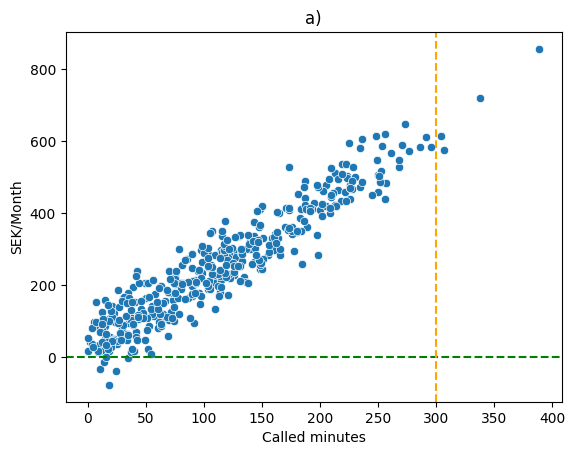

In [90]:
## a) 

seed =  42

# Generate simulated data
x = np.random.normal(100,100, 400)
x = np.absolute(x)
# Generate 
E = np.random.normal(0, 50, 400)

data = {"X" : x, "y": (x*2 + 25 + E)}
df  = pd.DataFrame(data)

display(df)
ax = sns.scatterplot(df, y="y", x="X")
ax.set(title="a)", ylabel="SEK/Month", xlabel="Called minutes")

ax = plt.axhline(0, color="green", linestyle= "dashed")
ax = plt.axvline(300, color="orange", linestyle= "dashed")

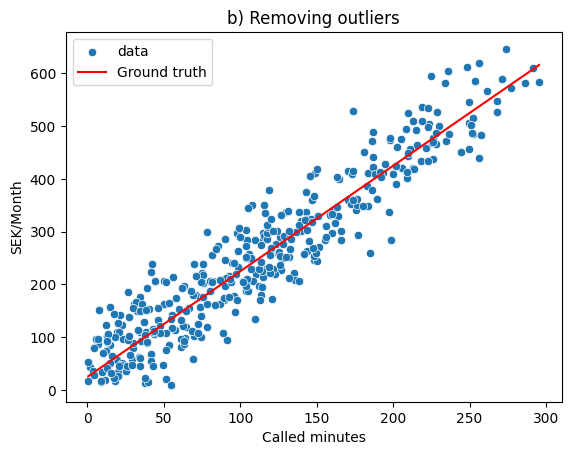

In [91]:
## b) 


## Dropping negative costs.
df.drop(df.loc[df["y"] < 0].index, inplace=True)

## Drop every call over 300 min
df.drop(df.loc[df["X"] > 300].index, inplace=True)

## Plot the new plot
ax = sns.scatterplot(df, x="X", y = "y", label="data")
ax.set(title="b) Removing outliers", ylabel="SEK/Month", xlabel="Called minutes")



## Calculate y_hat with given values for B1,B0
beta_0 = 25
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x
ax = sns.lineplot(df, x="X", y=y_hat(df["X"]), color="red", label="Ground truth")


In [92]:
## X = Minutes, Y = Cost in SEK/Month
df.head()
df["X"]

0      113.657322
1      148.754371
2      123.253626
3      183.560010
4       41.274538
          ...    
395     28.878139
396    119.479250
397     68.027826
398    131.625740
399     38.442145
Name: X, Length: 390, dtype: float64

##  1.  Train, test split


In [93]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction= 0.7, random_state=42, replace=False):
    
    X_train = X.sample(n=int(len(X)*train_fraction), random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)

    y_train = y.sample(n=int(len(y)*train_fraction), random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)


    return(X_train, X_test, y_train, y_test)
    

X_tr, X_te, y_tr, y_te = train_test_split(df["X"], df["y"])


print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)


(273,) (117,) (273,) (117,)


## 2. Simple linear regression with normal equation

33.30092628909778 1.9921462792758706 35.39306126113982 1.9219861211038225


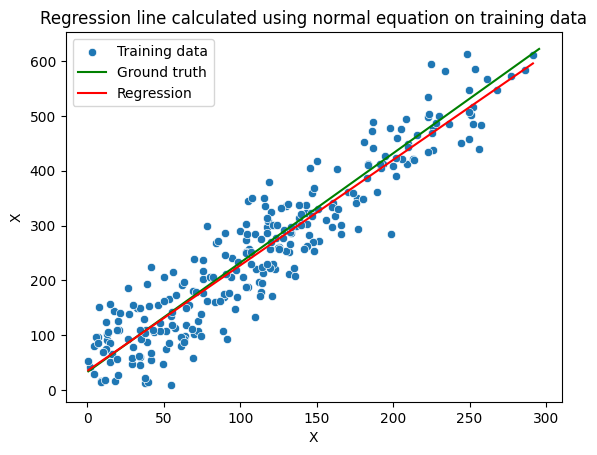

In [96]:
ax = sns.scatterplot(x=X_tr, y=y_tr, label="Training data")
ax.set_title("Regression line calculated using normal equation on training data")

beta_1, beta_0 = np.polyfit(X_te,y_te, deg=1)

def test_y_hat(x):
    return beta_0 + beta_1*x



## Ground truth with test data
ax = sns.lineplot(x=X_te, y=test_y_hat(X_te), color="green", label="Ground truth")


# Regression line with training data
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)

beta_1_tr, beta_0_tr  = np.polyfit(X_tr, y_tr, deg=1)

def beta_hat(x):
    return beta_0_tr + beta_1_tr*x



ax = sns.lineplot(x=X_tr, y=beta_hat(X_tr), color="Red", label="Regression")

print(beta_0, beta_1, beta_0_tr, beta_1_tr)

## 3. Prediction and evaluation